In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 암호화

In [2]:
S = input()[:-7] #마지막 7비트는 EOF

10101001101000110100111100110100000110100111100110100000110000101000001110100110010111110001110100010000011101001101111010000011101001100101111001111101000100000110001011001011110100111010011001011110010010000011100111110100110010111001111100001110111011011111100111111001011000011110000110100011110010100000111010011001011100011110100011011101101111110110011011111100111111100101011100001010


(41, 41, 3)


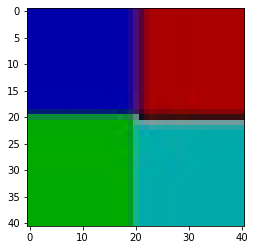

In [3]:
img = cv2.imread('colorimg.jpg')

plt.imshow(img)
shape = img.shape
print(shape)

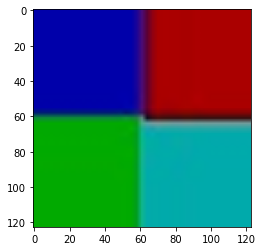

In [4]:
r_img = cv2.resize(img, dsize=None, fx=3, fy=3)
plt.imshow(r_img)

In [5]:
def create_image(h, w, d):
    image = np.zeros((h, w,  d), np.uint8)
    color = tuple(reversed((0,0,0)))
    image[:] = color
    return image

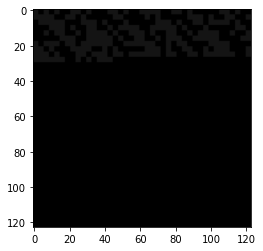

In [79]:
ecr_b = create_image(shape[0]*3,shape[1]*3,img.shape[2])

L = len(S)

is_exeeded = False
coord = 0

for y in range(0,shape[1]):
    for x in range(0,shape[0]):
        coord = y*shape[0]+x
        if coord > L-1:
            break
        if S[coord] == '1':
            for i in range(0,3):
                for j in range(0,3):
                    ecr_b[y*3+i,x*3+j]+=20
    if coord > L-1:
        break

plt.imshow(ecr_b)

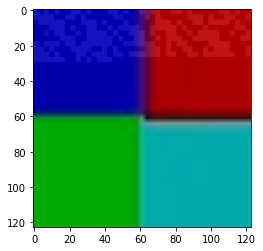

In [80]:
ecr = r_img + ecr_b
plt.imshow(ecr)

In [81]:
cv2.imwrite('encrypted.jpg',ecr,params=[cv2.IMWRITE_PNG_COMPRESSION,0])

True

# 이미지 복호화 

In [82]:
ecp = cv2.imread('encrypted.jpg')
e_shape = ecp.shape
print(e_shape)

(123, 123, 3)


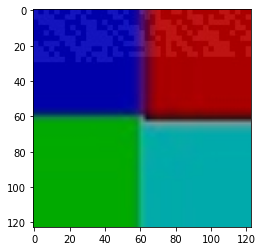

In [83]:
plt.imshow(ecp)

In [87]:
S_e = ""
mask = ((0.2,0.5,0.2),
        (0.5,2.0,0.5),
        (0.2,0.5,0.2))

Yhigh = e_shape[1]//3
Xhigh = e_shape[0]//3

for y in range(0,Yhigh):
    for x in range(0,Xhigh):
        s = 0
        for i in range(3):
            for j in range(3):
                s += (int(ecp[y*3+i,x*3+j,2]) - int(img[y,x,2]))*mask[i][j]
        s/=4.8
        S_e += str(int(s>16))


In [88]:
for i in range(len(S_e)//7):
    print(chr(int(S_e[i*7:i*7+7],2)),end = '')

This is a text to test better steganography technology.                                                                                                                                                                                         